In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import flare_prob
import toymodel
import LSSToy

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [7]:
files= np.loadtxt('trilegal_models/cluster_index.txt', comments='#', unpack=True, 
                         usecols=(0,), dtype='str')

In [16]:
# compute the densities of GKM stars 
l, b, r2, mvG2, mvK0, mvM0, nG, nK, nM = np.loadtxt('trilegal_models/cluster_index.txt', comments='#', 
                                                    unpack=True, dtype='float', usecols=(1,2,3,4,5,6,7,8,9))

fov = 0.1 # sq deg
Teff_bins = np.log10(np.arange(3000,8000,1000))
clrs = ['crimson','darkorange','cornflowerblue']


(15, 28)

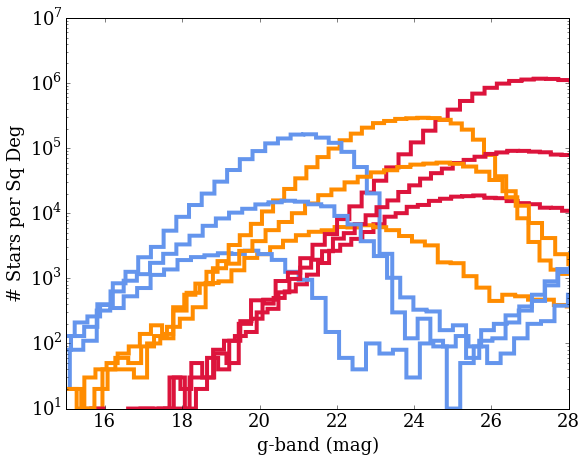

In [38]:
nG_f = np.zeros_like(nG)
nK_f = np.zeros_like(nK)
nM_f = np.zeros_like(nM)

plt.figure(figsize=(9,7))
for j in range(len(files)):
    file = 'trilegal_models/' + files[j]
    df = pd.read_table(file, sep=r"\s*", engine='python')

    # get densities of GKM stars in each field, compute total # of GKM field stars within r2 radius
    for k in range(len(Teff_bins)-2):
        x = np.where((df['logg'] >= 4) & (df['logTe'] >= Teff_bins[k]) & (df['logTe'] < Teff_bins[k+1]))
        _ = plt.hist(df['g'].values[x], bins=50, color=clrs[k], histtype='step', lw=4, 
                     weights=np.ones(len(x[0])) / fov)

    # within each temp bin for this cluster, count # of stars inside magnitude range of cluster (distance)
    x = np.where((df['logg'] >= 4) & (df['logTe'] >= Teff_bins[k]) & (df['logTe'] < Teff_bins[k+1]) & 
                 (df['g'].values >= mvG2[j]-0.25) & (df['g'].values <= mvG2[j]+1.25))
    nG_f[j] = len(x[0]) / fov * np.pi * r2[j]**2.

    x = np.where((df['logg'] >= 4) & (df['logTe'] >= Teff_bins[k]) & (df['logTe'] < Teff_bins[k+1]) & 
                 (df['g'].values >= mvK0[j]-0.25) & (df['g'].values <= mvK0[j]+1.25))
    nK_f[j] = len(x[0]) / fov * np.pi * r2[j]**2.

    x = np.where((df['logg'] >= 4) & (df['logTe'] >= Teff_bins[k]) & (df['logTe'] < Teff_bins[k+1]) & 
                 (df['g'].values >= mvM0[j]-0.25) & (df['g'].values <= mvM0[j]+1.25))
    nM_f[j] = len(x[0]) / fov * np.pi * r2[j]**2.

    
plt.yscale('log')
plt.xlabel('g-band (mag)')
plt.ylabel('# Stars per Sq Deg')
plt.xlim(15,28)

In [33]:
nG

array([   99.52565527,  1280.6011302 ,  3588.01296966])

In [32]:
nG_f

array([ 90.,  90.,  75.])

In [34]:
nM

array([ 1650.,  1650.,  1500.])

In [35]:
nM_f

array([   1905.463909  ,  132872.454912  ,   41230.34052553])

In [44]:
# print(files)
# print(nG/nG_f)
# print(nK/nK_f) 
# print(nM/nM_f)
for k in range(len(files)):
    print(files[k], nG[k]/nG_f[k], nK[k]/nK_f[k], nM[k]/nM_f[k] )

('NGC_2477.dat', 0.90428944938576894, 0.6315672344916482, 0.86593085925671143)
('NGC_5316.dat', 0.070279494432524653, 0.035437261538883547, 0.01241792364785283)
('IC_4651.dat', 0.020902934474900884, 0.020033114676360254, 0.03638097529345502)
